**Análise de segmentação de clientes - Kmeans**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from mpl_toolkits import mplot3d

In [12]:
# Ler os dados
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head(3))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6


In [13]:
# Dropar colunas que não serão usadas
df = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
print(df.head(3))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6


In [14]:
# Renomear colunas
df.rename(columns={'Annual Income (k$)' : 'Renda Anual (mil $)', 'Spending Score (1-100)' : 'Pontuação de Gastos'}, inplace=True)
print(df.head(3))

   Renda Anual (mil $)  Pontuação de Gastos
0                   15                   39
1                   15                   81
2                   16                    6


In [5]:
# Calcular Silhouette Score para diferentes valores de k
## Silhouette Score é uma métrica que mede a qualidade da divisão dos dados em clusters.
SK = range(3, 13)
sil_score = []
for i in SK:
    labels = cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df, labels, metric="euclidean", sample_size=1000, random_state=200)
    sil_score.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

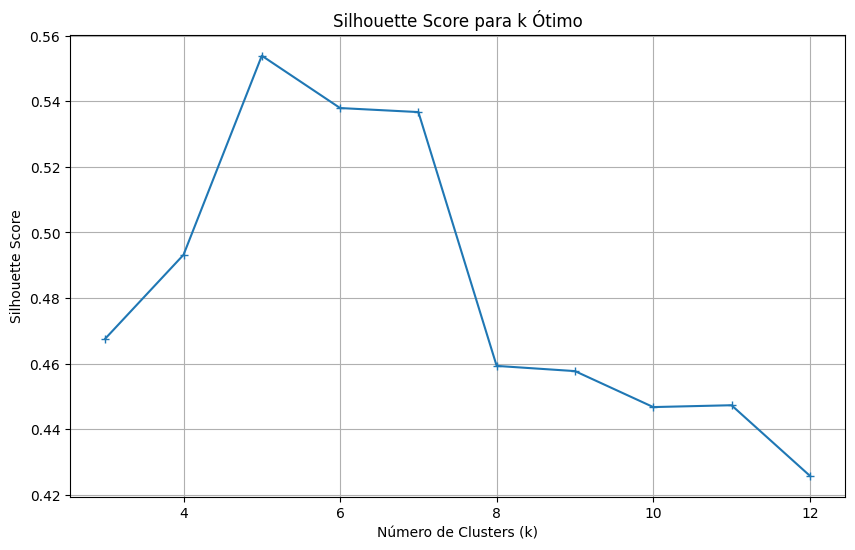

In [6]:
# Gráfico: Silhouette Score vs. Número de clusters
sil_centers = pd.DataFrame({'Clusters': SK, 'Sil Score': sil_score})
plt.figure(figsize=(10, 6))
plt.plot(sil_centers['Clusters'], sil_centers['Sil Score'], marker="+")
plt.title('Silhouette Score para k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [7]:
# Encontrar o número ótimo de clusters com base no Silhouette Score
optimal_k = sil_centers['Clusters'][sil_centers['Sil Score'].idxmax()]
print("Número ótimo de clusters com base no Silhouette Score:", optimal_k)

Número ótimo de clusters com base no Silhouette Score: 5


In [16]:
# Realizar clustering KMeans
kmeans = cluster.KMeans(n_clusters=optimal_k, init="k-means++")
kmeans = kmeans.fit(df)
df['Clusters'] = kmeans.labels_
print(kmeans.labels_)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 2 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


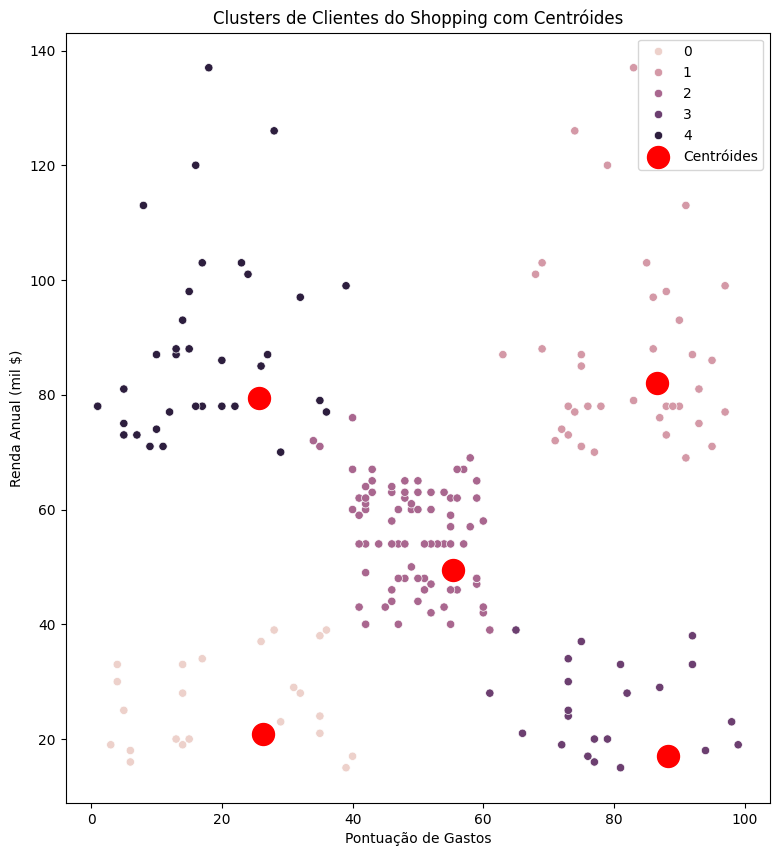

In [18]:
# Subplot para o gráfico de dispersão
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x="Pontuação de Gastos", y="Renda Anual (mil $)", hue='Clusters', data=df)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=250, c='red', label='Centróides')
plt.title('Clusters de Clientes do Shopping com Centróides')
plt.xlabel('Pontuação de Gastos')
plt.ylabel('Renda Anual (mil $)')
plt.legend()

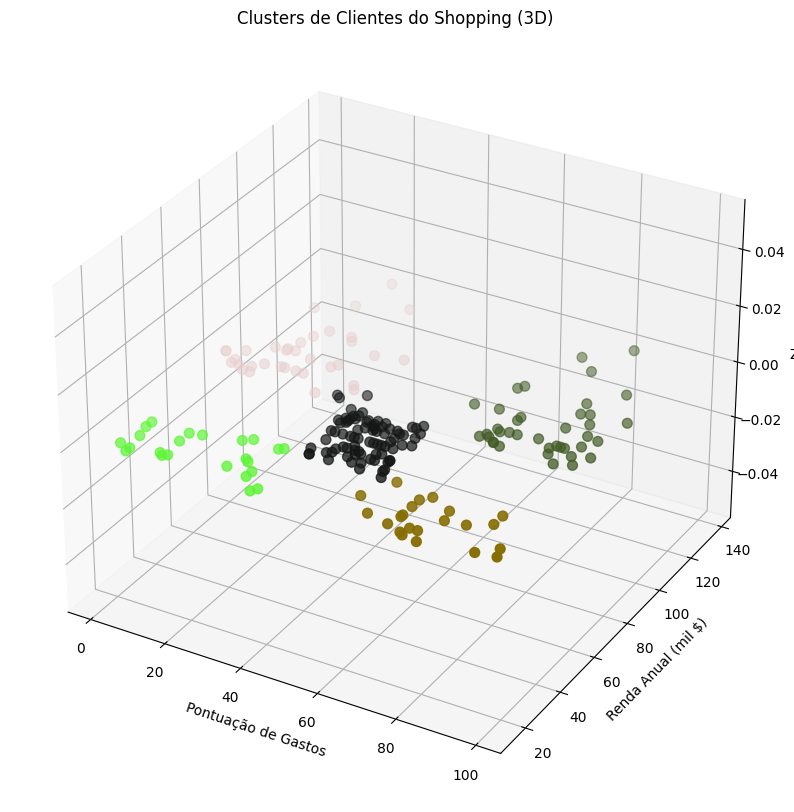

In [20]:
# Subplot para o gráfico tridimensional
fig = plt.figure(figsize=(24, 10))
ax = plt.subplot(1, 2, 2, projection='3d')
colors = ['#5DF534', '#425B26', '#151716', '#876E03', '#E8CECF', '#023411', '#042E54', '#2572D3', '#FD0D0C', '#169C90']
df['color'] = df['Clusters'].map(lambda x: colors[x])
ax.scatter3D(df['Pontuação de Gastos'], df['Renda Anual (mil $)'], np.zeros_like(df['Renda Anual (mil $)']), c=df['color'], s=50)
ax.set_title('Clusters de Clientes do Shopping (3D)')
ax.set_xlabel('Pontuação de Gastos')
ax.set_ylabel('Renda Anual (mil $)')
ax.set_zlabel('Z')
plt.show()